In [199]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy as sp
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
from sympy.utilities.iterables import generate_bell
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def split_clusters(data, labels):
    k = max(labels)
    split = []
    for g in np.arange(k+1):
        its = labels == g
        split.append(data[its])
    return split

def max_dist(cluster):
    dists = sp.spatial.distance.cdist(cluster, cluster, 'euclidean')
    return np.amax(dists)

def min_dists(centroids):
    dists = sp.spatial.distance.cdist(centroids, centroids, 'euclidean')
    min_dist = 1e10
    for i in np.arange(dists.shape[0]):
        for j in np.arange(i+1, dists.shape[1]):
            min_dist = min(min_dist, dists[i][j])
    return min_dist

def dunn_index(data, labels, centroids):
    clusters = split_clusters(data, labels)
    max_d = np.amax(map(lambda c: max_dist(c), clusters))
    min_d = min_dists(centroids)
    return min_d / max_d

def cluster_scatter(data, centroid, p=2):
    x = np.apply_along_axis(lambda r: np.linalg.norm(r), 1, (data-centroid)**p)
    x = (np.sum(x, axis=0) / data.shape[0]) ** (1.0/p)
    return x

def measure_of_separation(c1, c2, p=2):
    return np.linalg.norm((c1 - c2), ord=p)

def db_index(data, labels, centroids):
    clusters = split_clusters(data, labels)
    s = np.zeros((len(clusters)))
    for i in np.arange(len(clusters)):
        s[i] = cluster_scatter(clusters[i], centroids[i])
        
    max_r = 0.0
    d = np.zeros((len(clusters)))
    for i in np.arange(len(clusters)):
        for j in np.arange(i, len(clusters)):
            if i != j:
                r = (s[i] + s[j]) / measure_of_separation(centroids[i], centroids[j])
                d[i] = max(r, d[i])
    return np.sum(d, axis=0) / (len(clusters))

def assess_result(data, labels, centroids):
    silhuette = metrics.silhouette_score(data, labels, metric='euclidean')
    dunn = dunn_index(data, labels, centroids)
    dbi = db_index(data, labels, centroids)
    print(dunn)
    print(dbi)

def plot_results(data, labels, centers, k):
    colors = cm.rainbow(np.linspace(0, 1, k))
    d = data.shape[1]
    fig, axes = plt.subplots(d, d)
    fig.subplots_adjust(left=0, right=2, top=2, bottom=0, hspace=.2, wspace=.2)
    subpl_num = 0
    for d1 in np.arange(d):
        for d2 in np.arange(d):
            subpl_num += 1
            if d1 != d2:
                plt.subplot(d, d, subpl_num)
                for c in np.arange(k):
                    its = labels == c
                    plt.scatter(data[its, d1], data[its, d2])
                no_group = labels == -1
                plt.scatter(data[no_group, d1], data[no_group, d2], marker='x', color='black')
    
#     print(centers.shape)
    if len(centers.shape) > 1 and centers.shape[1] > 1:
        plt.scatter(centers[:, 0], centers[:, 1], marker='x')
    plt.show()

0.691961843846
0.360315335628


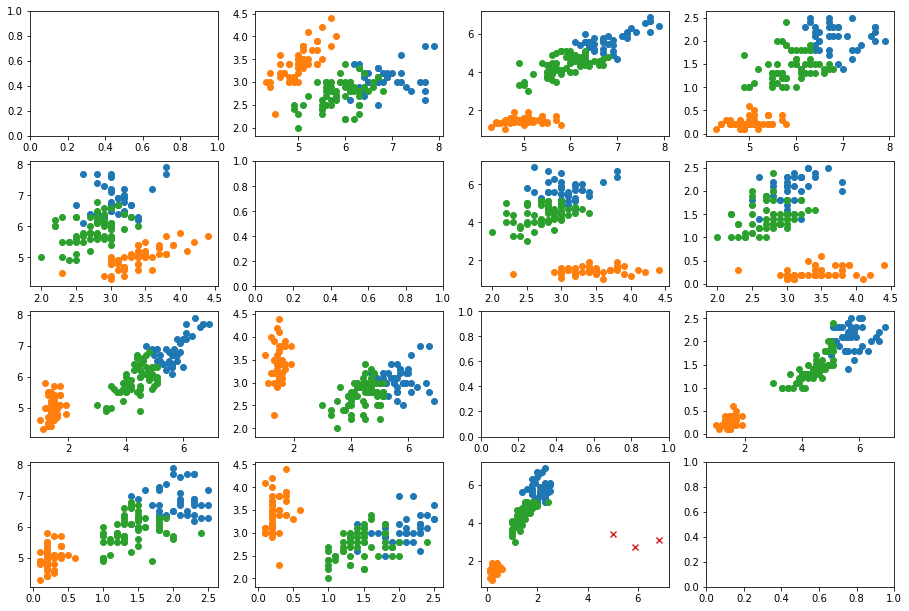

In [200]:
##### task 0 #####
##### a #####

# n_init: int, default 10
# Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia.

# Generally - the greater n_init the better chance of satisfying result
iris = datasets.load_iris() 
k = 3
kmeans = KMeans(k, n_init=1)
kmeans.fit(iris.data)
assess_result(iris.data, kmeans.labels_, kmeans.cluster_centers_)
plot_results(iris.data, kmeans.labels_, kmeans.cluster_centers_, k)

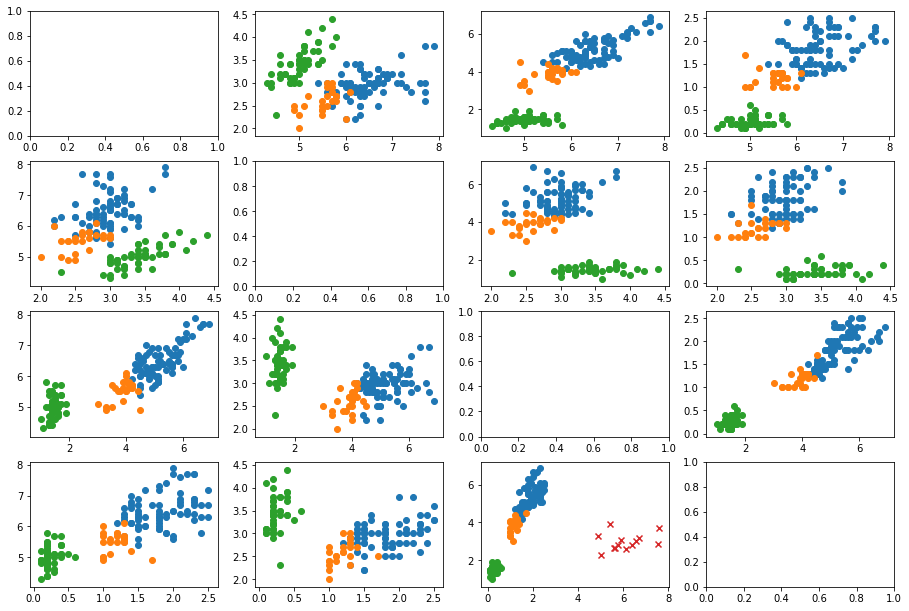

In [91]:
##### b #####
from sklearn.cluster import Birch
# threshold : float, default 0.5
# The radius of the subcluster obtained by merging a new sample and the closest subcluster should be lesser than the threshold. Otherwise a new subcluster is started. 
# Setting this value to be very low promotes splitting and vice-versa.
birch = Birch(n_clusters=3)
birch.fit(iris.data)
plot_results(iris.data, birch.labels_, birch.subcluster_centers_, k)


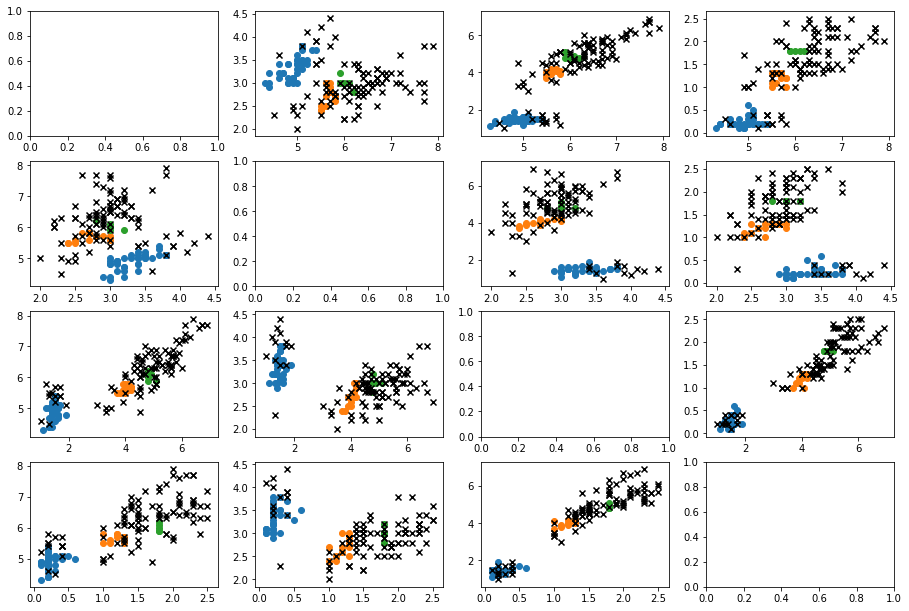

In [95]:
##### c #####
from sklearn.cluster import DBSCAN
# eps : float, optional
# The maximum distance between two samples for them to be considered as in the same neighborhood.
dbscan = DBSCAN(eps=0.3)
dbscan.fit(iris.data)
plot_results(iris.data, dbscan.labels_, np.array([]), k)

In [180]:
import numpy as np
x = np.array([1,2,3])
# np.linalg.norm(x)
# np.sqrt(14.0)

3.7416573867739413